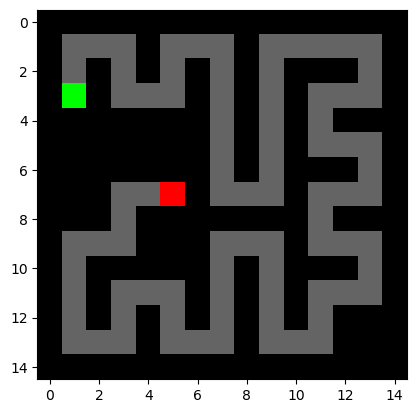

test1: 44 44


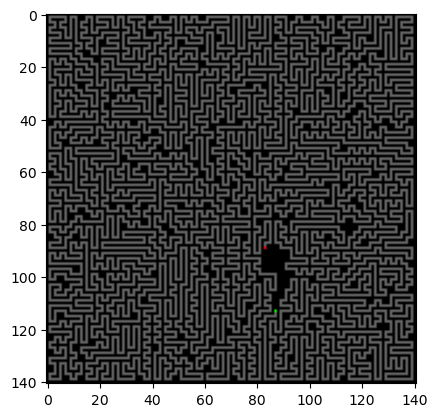

part1: 1365 1365


In [1]:
from matplotlib import pyplot as plt
import numpy as np


def render(m,S,E,pa=None):
    #print(S,E)
    w=max([int(x.real) for x in m])+1
    h=max([int(x.imag) for x in m])+1
    img=np.zeros([h,w,3],dtype=np.uint8)
    for p,c in m.items():
        x=int(p.real)
        y=int(p.imag)
        col=[0,0,0]
        if p==S:
            col=[0,255,0]
        elif p==E:
            col=[255,0,0]
        elif c==".":
            col=[100,100,100]
        
        img[y,x,:]=col
    if not pa is None:
        for p in pa:
            x=int(p.real)
            y=int(p.imag)
            img[y,x,0]=255
            img[y,x,2]=255
    plt.imshow(img)
    plt.show()
        
    
def path(s):
    r=[]

    while 1:
        print("path",s)
        pos=list(s)[0]
        past=list(s)[-1]
        r.append(pos)
        if past is None:
            break
        else:
            s=past
    return r

def parse(fn):
    m={}
    S=None
    E=None
    for y,l in enumerate(open(fn).readlines()):
        for x,c in enumerate(l):
            p=x+y*1j
            
            if c=="S":
                m[p]="."
                S=p
            elif c=="E":
                m[p]="."
                E=p
            elif c in "#.":
                m[p]=c
    return m,S,E


def search(m,S,E,cl,ct=None):
    #pos,tim,cheat,past
    o=[(S,0,cl,[S])]
    clo={}
    sol={}
    cp={}
    while len(o):
        s=o[0]
        o=o[1:]
        #print(s)
        
        pos,tim,ch,past=s
        #if (pos,tim,ch) in clo:
        #    continue
        #clo[(pos,tim,ch)]=1
        
        
        
        if 1:
            for d in [1,1j,-1,-1j]:
                pp=pos+d
                if not pp in m:
                    continue
                if pp in past:
                    continue
                if pp in cp:
                    pass
                    continue
                if m[pos]==".":
                    if m[pp]==".":
                        o.append((pp,tim+1,ch,past+[pp]))
                    elif ch==cl:
                        o.append((pp,tim+1,ch-1,past+[pp]))
                        cp[pp]=1
                else:
                    if m[pp]==".":
                        if pp in ct:
                            saving=(ct[S]-ct[pp])-(tim+1)
                            if saving>0:
                                if not saving in sol:
                                    sol[saving]=0
                                sol[saving]+=1
                    elif ch>1:        
                        o.append((pp,tim+1,ch-1,past+[pp]))
                        cp[pp]=1
    return sol

def getct(m,S,E):
    ct={}
    o=[(E,0)]
    while len(o):
        p,c=o[0]
        o=o[1:]
        if p in ct:
            continue
        ct[p]=c
        for d in [1,1j,-1,-1j]:
            pp=p+d
            if pp in m and m[pp]==".":
                o.append((pp,c+1))
    return ct


def solve(fn,cutoff,cl):    
    
    
    m,S,E=parse(fn)
    
    ct=getct(m,S,E)
    
    render(m,S,E)
    
    r=0
    for k,v in search(m,S,E,cl,ct).items():
        if k >= cutoff:
            r+=v
    return r
                            

print("test1:",solve("20.tst",0,2),44)
print("part1:",solve("20.txt",100,2),1365)



In [2]:
def searchplain(m,S,E):
    o=[(S,0,[S])]
    c={}
    while len(o):
        o.sort(key=lambda x: x[1])
        s=o[0]
        o=o[1:]
        p,cst,past=s
        
        if p in c:
            continue
        if p==E:
            return s
        
        for d in [1,1j,-1,-1j]:
            pp=p+d
            if pp in c:
                continue
            if pp in past:
                continue
            if pp in m and m[pp]==".":
                o.append((pp,cst+1,past+[pp]))
    return None

def smutveje(pos,m,ct,cutoff):
    
    cheats=[]
    o=[(pos,0,[pos])]
    cl={}
    while len(o):
        
        s=o[0]
        o=o[1:]
        p,c,past=s
        if (p,c) in cl:
            continue
            pass
        
        cl[(p,c)]=1
        
        #print(p,end="\r")
        for d in [1,1j,-1,-1j]:
            pp=p+d
            cc=c+1
            if pp in m:
                if not pp in past:
                    if m[pp]=="#":
                        if cc<20:
                            o.append((pp,cc,[past[0],pp]))
                    else:
                        if cc<=20:
                            v=(ct[pos]-ct[pp])-cc
                            if v>=cutoff:
                                cheats.append((v,past+[pp]))
                            o.append((pp,cc,[past[0],pp])) 
    
    #print(" *** ",cheats)            
    return cheats


def solve2(fn,cutoff,cl,sl=None):
    m,S,E=parse(fn)
    
    ct=getct(m,S,E)
    #render(m,S,E,ct.keys())
    _,cst,path =searchplain(m,S,E)
    #render(m,S,E,path)
    cheats=[]
    #print(S,E,path[0],path[-1])
    for i,p in enumerate(path):
        print(i,"   ",len(path),end="    \r")
        #print("searching smutveje in ",p)
        for smut in smutveje(p,m,ct,cutoff):
            value,path2=smut
            #render(m,S,E,path2)
            cheats.append(smut)
    
    print()
    #find best a2b
    z={}
    for v,path in cheats:
        y=(path[0], path[-1])
        if y not in z or v>z[y]:
            z[y]=v
    
    cnt={}
    for k in z.keys():
        v=z[k]
        if not v in cnt:
            cnt[v]=[]
        cnt[v].append(k)
    
    res=0
    for i,v in enumerate(sorted(cnt.keys())):
        l=len(cnt[v])
        #print(l," of ", v, "(",sl[i],")")
        res+=l
    return res

sl=[3,4,22,12,14,12,19,20,23,25,39,29,31,32][::-1]

print("test2:",solve2("20.tst",50,20,sl),285)
print("part2:",solve2("20.txt",100,20),2)
#5634 too low
#92385



84     85    
test2: 285 285
9408     9409    
part2: 986082 2
